#### Audio Classification Data Preprocessing

In [49]:
import librosa
audio_file_path='UrbanSound8K/dog_bark.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [50]:
print(librosa_audio_data)

[-0.01220688 -0.00425557  0.02662518 ... -0.00780272 -0.01718606
 -0.00032092]


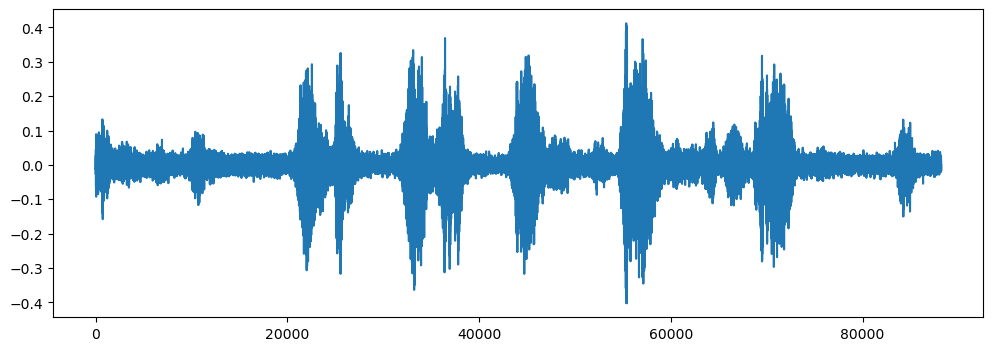

In [51]:
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [52]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [53]:
wave_audio

array([[  879, -1692],
       [ 1363, -2290],
       [ 1349, -1792],
       ...,
       [ -264,  -275],
       [  259,  -238],
       [  479,  -437]], dtype=int16)

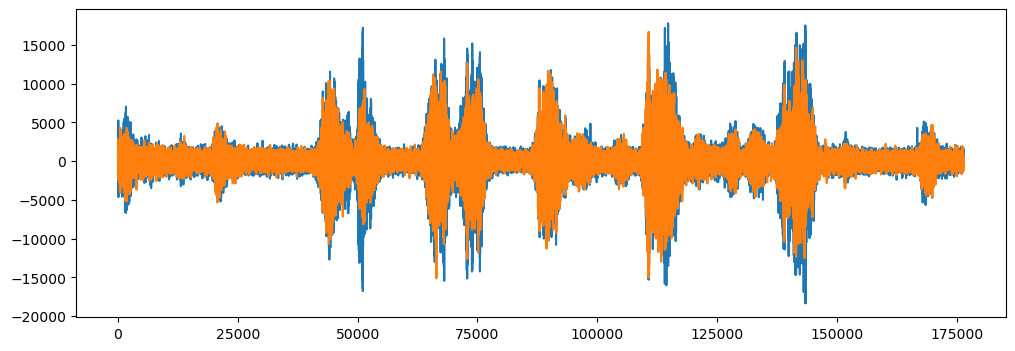

In [54]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

### Extract Features
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio 
samples.
The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [55]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [56]:
mfccs

array([[-2.3584998e+02, -1.9523190e+02, -1.8908876e+02, ...,
        -2.3250938e+02, -2.3129018e+02, -2.5024088e+02],
       [ 1.8677212e-01,  6.9516766e-01,  5.0802908e+00, ...,
         3.2958580e+01,  3.1441509e+01,  3.2176582e+01],
       [-1.2062029e+01, -1.6684906e+01, -2.2606384e+01, ...,
         9.2764883e+00,  4.2593160e+00, -2.8338380e+00],
       ...,
       [-2.9202132e+00, -5.1036668e-01,  2.3596532e+00, ...,
         7.1914911e+00,  4.2272968e+00, -1.3353980e+00],
       [-8.4397335e+00, -1.1154949e+01, -6.1777020e+00, ...,
        -3.6048963e+00, -3.9950318e+00, -5.1855106e+00],
       [-2.7379189e+00, -3.1309071e+00, -7.0968002e-01, ...,
        -2.7699509e+00, -1.5107248e+00, -1.8956108e+00]], dtype=float32)

In [57]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [58]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features
    

In [59]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3553it [02:19, 26.92it/s]C:\Myfiles\Apps\envs\tensor\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
8324it [04:53, 41.44it/s]C:\Myfiles\Apps\envs\tensor\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
C:\Myfiles\Apps\envs\tensor\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)
8732it [05:06, 28.52it/s]


In [60]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22339, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402206, 60.302044,...",children_playing


In [61]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [62]:
X.shape

(8732, 40)

In [63]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [64]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [65]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [66]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [67]:
X_train

array([[-1.31104706e+02,  1.12505905e+02, -2.25746956e+01, ...,
         3.24665260e+00, -1.36902368e+00,  2.75575471e+00],
       [-1.36703424e+01,  9.10850830e+01, -7.79273319e+00, ...,
        -3.25305080e+00, -5.27745247e+00, -1.55697143e+00],
       [-4.98715439e+01,  2.65353173e-01, -2.05009365e+01, ...,
         2.85459447e+00, -1.60920465e+00,  3.52480578e+00],
       ...,
       [-4.27012360e+02,  9.26230469e+01,  3.12939763e+00, ...,
         7.42641389e-01,  7.33490944e-01,  7.11009085e-01],
       [-1.45754608e+02,  1.36265778e+02, -3.35155220e+01, ...,
         1.46811950e+00, -2.00917006e+00, -8.82181883e-01],
       [-4.21031342e+02,  2.10654541e+02,  3.49066067e+00, ...,
        -5.38886738e+00, -3.37136054e+00, -1.56651151e+00]], dtype=float32)

In [68]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [69]:
X_train.shape

(6985, 40)

In [70]:
X_test.shape

(1747, 40)

In [71]:
y_train.shape

(6985, 10)

In [72]:
y_test.shape

(1747, 10)

### Model Creation

In [73]:
import tensorflow as tf
print(tf.__version__)

1.13.1


In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [75]:
### No of classes
num_labels=y.shape[1]

In [76]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [77]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               4100      
_________________________________________________________________
activation_4 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_5 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               20100     
__________

In [78]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [79]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 400
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Train on 6985 samples, validate on 1747 samples
Epoch 1/400
6720/6985 [===========================>..] - ETA: 0s - loss: 12.6588 - acc: 0.1262
Epoch 00001: val_loss improved from inf to 5.26495, saving model to saved_models/audio_classification.hdf5
6985/6985 [==============================] - 1s 95us/sample - loss: 12.5671 - acc: 0.1283 - val_loss: 5.2650 - val_acc: 0.2713
Epoch 2/400
5600/6985 [=======================>......] - ETA: 0s - loss: 6.5446 - acc: 0.1702
Epoch 00002: val_loss improved from 5.26495 to 2.26867, saving model to saved_models/audio_classification.hdf5
6985/6985 [==============================] - 0s 41us/sample - loss: 5.7763 - acc: 0.1674 - val_loss: 2.2687 - val_acc: 0.1294
Epoch 3/400
5632/6985 [=======================>......] - ETA: 0s - loss: 2.3575 - acc: 0.1468
Epoch 00003: val_loss improved from 2.26867 to 2.20350, saving model to saved_models/audio_classification.hdf5
6985/6985 [==============================] - 0s 41us/sample - loss: 2.3435 - acc: 0.154

Epoch 26/400
5696/6985 [=======================>......] - ETA: 0s - loss: 1.3327 - acc: 0.5356
Epoch 00026: val_loss did not improve from 1.12597
6985/6985 [==============================] - 0s 39us/sample - loss: 1.3390 - acc: 0.5384 - val_loss: 1.1636 - val_acc: 0.6251
Epoch 27/400
5824/6985 [========================>.....] - ETA: 0s - loss: 1.3266 - acc: 0.5500
Epoch 00027: val_loss improved from 1.12597 to 1.08632, saving model to saved_models/audio_classification.hdf5
6985/6985 [==============================] - 0s 40us/sample - loss: 1.3198 - acc: 0.5508 - val_loss: 1.0863 - val_acc: 0.6485
Epoch 28/400
5664/6985 [=======================>......] - ETA: 0s - loss: 1.3138 - acc: 0.5496
Epoch 00028: val_loss did not improve from 1.08632
6985/6985 [==============================] - 0s 39us/sample - loss: 1.3067 - acc: 0.5526 - val_loss: 1.1051 - val_acc: 0.6337
Epoch 29/400
5664/6985 [=======================>......] - ETA: 0s - loss: 1.3049 - acc: 0.5629
Epoch 00029: val_loss improve

6985/6985 [==============================] - 0s 41us/sample - loss: 1.0636 - acc: 0.6408 - val_loss: 0.8742 - val_acc: 0.7355
Epoch 54/400
6976/6985 [============================>.] - ETA: 0s - loss: 1.0517 - acc: 0.6385
Epoch 00054: val_loss improved from 0.87417 to 0.86902, saving model to saved_models/audio_classification.hdf5
6985/6985 [==============================] - 0s 42us/sample - loss: 1.0517 - acc: 0.6387 - val_loss: 0.8690 - val_acc: 0.7315
Epoch 55/400
5728/6985 [=======================>......] - ETA: 0s - loss: 1.0713 - acc: 0.6329
Epoch 00055: val_loss did not improve from 0.86902
6985/6985 [==============================] - 0s 39us/sample - loss: 1.0684 - acc: 0.6355 - val_loss: 0.8964 - val_acc: 0.7086
Epoch 56/400
5632/6985 [=======================>......] - ETA: 0s - loss: 1.0725 - acc: 0.6447
Epoch 00056: val_loss did not improve from 0.86902
6985/6985 [==============================] - 0s 39us/sample - loss: 1.0720 - acc: 0.6434 - val_loss: 0.8998 - val_acc: 0.722

Epoch 82/400
5664/6985 [=======================>......] - ETA: 0s - loss: 0.9751 - acc: 0.6686
Epoch 00082: val_loss did not improve from 0.77950
6985/6985 [==============================] - 0s 39us/sample - loss: 0.9821 - acc: 0.6683 - val_loss: 0.7955 - val_acc: 0.7539
Epoch 83/400
5728/6985 [=======================>......] - ETA: 0s - loss: 0.9793 - acc: 0.6723
Epoch 00083: val_loss did not improve from 0.77950
6985/6985 [==============================] - 0s 38us/sample - loss: 0.9717 - acc: 0.6759 - val_loss: 0.7796 - val_acc: 0.7516
Epoch 84/400
5632/6985 [=======================>......] - ETA: 0s - loss: 0.9510 - acc: 0.6781
Epoch 00084: val_loss did not improve from 0.77950
6985/6985 [==============================] - 0s 39us/sample - loss: 0.9588 - acc: 0.6766 - val_loss: 0.7911 - val_acc: 0.7504
Epoch 85/400
5664/6985 [=======================>......] - ETA: 0s - loss: 0.9612 - acc: 0.6757
Epoch 00085: val_loss improved from 0.77950 to 0.77383, saving model to saved_models/audi

Epoch 111/400
5696/6985 [=======================>......] - ETA: 0s - loss: 0.9365 - acc: 0.6761
Epoch 00111: val_loss did not improve from 0.72283
6985/6985 [==============================] - 0s 39us/sample - loss: 0.9431 - acc: 0.6720 - val_loss: 0.7549 - val_acc: 0.7687
Epoch 112/400
5760/6985 [=======================>......] - ETA: 0s - loss: 0.9437 - acc: 0.6878
Epoch 00112: val_loss did not improve from 0.72283
6985/6985 [==============================] - 0s 38us/sample - loss: 0.9507 - acc: 0.6859 - val_loss: 0.7597 - val_acc: 0.7670
Epoch 113/400
5696/6985 [=======================>......] - ETA: 0s - loss: 0.9207 - acc: 0.6970
Epoch 00113: val_loss did not improve from 0.72283
6985/6985 [==============================] - 0s 39us/sample - loss: 0.9270 - acc: 0.6933 - val_loss: 0.7410 - val_acc: 0.7722
Epoch 114/400
6944/6985 [============================>.] - ETA: 0s - loss: 0.9175 - acc: 0.6930
Epoch 00114: val_loss did not improve from 0.72283
6985/6985 [=======================

5664/6985 [=======================>......] - ETA: 0s - loss: 0.9017 - acc: 0.6946
Epoch 00140: val_loss did not improve from 0.69954
6985/6985 [==============================] - 0s 39us/sample - loss: 0.8899 - acc: 0.6986 - val_loss: 0.7077 - val_acc: 0.7836
Epoch 141/400
5728/6985 [=======================>......] - ETA: 0s - loss: 0.8915 - acc: 0.7067
Epoch 00141: val_loss did not improve from 0.69954
6985/6985 [==============================] - 0s 39us/sample - loss: 0.9058 - acc: 0.6969 - val_loss: 0.7080 - val_acc: 0.7882
Epoch 142/400
5696/6985 [=======================>......] - ETA: 0s - loss: 0.8912 - acc: 0.7070
Epoch 00142: val_loss did not improve from 0.69954
6985/6985 [==============================] - 0s 39us/sample - loss: 0.8987 - acc: 0.7057 - val_loss: 0.7171 - val_acc: 0.7762
Epoch 143/400
5664/6985 [=======================>......] - ETA: 0s - loss: 0.8766 - acc: 0.7064
Epoch 00143: val_loss did not improve from 0.69954
6985/6985 [==============================] - 0s 

Epoch 169/400
5664/6985 [=======================>......] - ETA: 0s - loss: 0.8755 - acc: 0.7117
Epoch 00169: val_loss did not improve from 0.68299
6985/6985 [==============================] - 0s 39us/sample - loss: 0.8843 - acc: 0.7082 - val_loss: 0.7042 - val_acc: 0.7836
Epoch 170/400
5760/6985 [=======================>......] - ETA: 0s - loss: 0.8543 - acc: 0.7078
Epoch 00170: val_loss improved from 0.68299 to 0.67956, saving model to saved_models/audio_classification.hdf5
6985/6985 [==============================] - 0s 41us/sample - loss: 0.8729 - acc: 0.7029 - val_loss: 0.6796 - val_acc: 0.7916
Epoch 171/400
5632/6985 [=======================>......] - ETA: 0s - loss: 0.8716 - acc: 0.7086
Epoch 00171: val_loss did not improve from 0.67956
6985/6985 [==============================] - 0s 39us/sample - loss: 0.8733 - acc: 0.7059 - val_loss: 0.7047 - val_acc: 0.7785
Epoch 172/400
6976/6985 [============================>.] - ETA: 0s - loss: 0.8955 - acc: 0.6988
Epoch 00172: val_loss did

5696/6985 [=======================>......] - ETA: 0s - loss: 0.8681 - acc: 0.7117
Epoch 00198: val_loss did not improve from 0.66100
6985/6985 [==============================] - 0s 39us/sample - loss: 0.8653 - acc: 0.7141 - val_loss: 0.6944 - val_acc: 0.7922
Epoch 199/400
5664/6985 [=======================>......] - ETA: 0s - loss: 0.8659 - acc: 0.7129
Epoch 00199: val_loss did not improve from 0.66100
6985/6985 [==============================] - 0s 39us/sample - loss: 0.8614 - acc: 0.7151 - val_loss: 0.6823 - val_acc: 0.7968
Epoch 200/400
5632/6985 [=======================>......] - ETA: 0s - loss: 0.8497 - acc: 0.7093
Epoch 00200: val_loss did not improve from 0.66100
6985/6985 [==============================] - 0s 40us/sample - loss: 0.8434 - acc: 0.7125 - val_loss: 0.6690 - val_acc: 0.7894
Epoch 201/400
5632/6985 [=======================>......] - ETA: 0s - loss: 0.8374 - acc: 0.7250
Epoch 00201: val_loss improved from 0.66100 to 0.64528, saving model to saved_models/audio_classifi

Epoch 228/400
5632/6985 [=======================>......] - ETA: 0s - loss: 0.8513 - acc: 0.7122
Epoch 00228: val_loss did not improve from 0.64151
6985/6985 [==============================] - 0s 39us/sample - loss: 0.8516 - acc: 0.7117 - val_loss: 0.6541 - val_acc: 0.8014
Epoch 229/400
5600/6985 [=======================>......] - ETA: 0s - loss: 0.8606 - acc: 0.7154
Epoch 00229: val_loss improved from 0.64151 to 0.64071, saving model to saved_models/audio_classification.hdf5
6985/6985 [==============================] - 0s 42us/sample - loss: 0.8558 - acc: 0.7134 - val_loss: 0.6407 - val_acc: 0.8105
Epoch 230/400
5568/6985 [======================>.......] - ETA: 0s - loss: 0.8548 - acc: 0.7243
Epoch 00230: val_loss did not improve from 0.64071
6985/6985 [==============================] - 0s 39us/sample - loss: 0.8643 - acc: 0.7178 - val_loss: 0.6453 - val_acc: 0.8088
Epoch 231/400
5792/6985 [=======================>......] - ETA: 0s - loss: 0.8470 - acc: 0.7241
Epoch 00231: val_loss did

Epoch 257/400
5632/6985 [=======================>......] - ETA: 0s - loss: 0.8400 - acc: 0.7232
Epoch 00257: val_loss did not improve from 0.62650
6985/6985 [==============================] - 0s 39us/sample - loss: 0.8459 - acc: 0.7200 - val_loss: 0.6469 - val_acc: 0.8088
Epoch 258/400
6912/6985 [============================>.] - ETA: 0s - loss: 0.8403 - acc: 0.7255
Epoch 00258: val_loss did not improve from 0.62650
6985/6985 [==============================] - 0s 40us/sample - loss: 0.8392 - acc: 0.7263 - val_loss: 0.6696 - val_acc: 0.7968
Epoch 259/400
5696/6985 [=======================>......] - ETA: 0s - loss: 0.8156 - acc: 0.7230
Epoch 00259: val_loss did not improve from 0.62650
6985/6985 [==============================] - 0s 39us/sample - loss: 0.8197 - acc: 0.7213 - val_loss: 0.6573 - val_acc: 0.7876
Epoch 260/400
5696/6985 [=======================>......] - ETA: 0s - loss: 0.8291 - acc: 0.7268
Epoch 00260: val_loss did not improve from 0.62650
6985/6985 [=======================

5632/6985 [=======================>......] - ETA: 0s - loss: 0.8109 - acc: 0.7294
Epoch 00287: val_loss did not improve from 0.62650
6985/6985 [==============================] - 0s 40us/sample - loss: 0.8254 - acc: 0.7248 - val_loss: 0.6457 - val_acc: 0.8008
Epoch 288/400
6976/6985 [============================>.] - ETA: 0s - loss: 0.8130 - acc: 0.7253
Epoch 00288: val_loss did not improve from 0.62650
6985/6985 [==============================] - 0s 40us/sample - loss: 0.8126 - acc: 0.7256 - val_loss: 0.6425 - val_acc: 0.8014
Epoch 289/400
5632/6985 [=======================>......] - ETA: 0s - loss: 0.8177 - acc: 0.7346
Epoch 00289: val_loss did not improve from 0.62650
6985/6985 [==============================] - 0s 39us/sample - loss: 0.8219 - acc: 0.7324 - val_loss: 0.6332 - val_acc: 0.8037
Epoch 290/400
6976/6985 [============================>.] - ETA: 0s - loss: 0.8339 - acc: 0.7246
Epoch 00290: val_loss did not improve from 0.62650
6985/6985 [==============================] - 0s 

Epoch 317/400
6144/6985 [=========================>....] - ETA: 0s - loss: 0.8199 - acc: 0.7336
Epoch 00317: val_loss did not improve from 0.61372
6985/6985 [==============================] - 0s 46us/sample - loss: 0.8295 - acc: 0.7326 - val_loss: 0.6447 - val_acc: 0.7985
Epoch 318/400
6048/6985 [========================>.....] - ETA: 0s - loss: 0.8051 - acc: 0.7254
Epoch 00318: val_loss did not improve from 0.61372
6985/6985 [==============================] - 0s 46us/sample - loss: 0.8153 - acc: 0.7214 - val_loss: 0.6384 - val_acc: 0.8054
Epoch 319/400
6464/6985 [==========================>...] - ETA: 0s - loss: 0.8281 - acc: 0.7279
Epoch 00319: val_loss did not improve from 0.61372
6985/6985 [==============================] - 0s 43us/sample - loss: 0.8284 - acc: 0.7274 - val_loss: 0.6386 - val_acc: 0.8031
Epoch 320/400
6624/6985 [===========================>..] - ETA: 0s - loss: 0.8113 - acc: 0.7290
Epoch 00320: val_loss did not improve from 0.61372
6985/6985 [=======================

Epoch 347/400
5568/6985 [======================>.......] - ETA: 0s - loss: 0.8038 - acc: 0.7317
Epoch 00347: val_loss did not improve from 0.60163
6985/6985 [==============================] - 0s 39us/sample - loss: 0.8004 - acc: 0.7330 - val_loss: 0.6451 - val_acc: 0.7945
Epoch 348/400
6944/6985 [============================>.] - ETA: 0s - loss: 0.8151 - acc: 0.7340
Epoch 00348: val_loss did not improve from 0.60163
6985/6985 [==============================] - 0s 40us/sample - loss: 0.8143 - acc: 0.7341 - val_loss: 0.6440 - val_acc: 0.8054
Epoch 349/400
6944/6985 [============================>.] - ETA: 0s - loss: 0.8238 - acc: 0.7333
Epoch 00349: val_loss did not improve from 0.60163
6985/6985 [==============================] - 0s 40us/sample - loss: 0.8224 - acc: 0.7339 - val_loss: 0.6300 - val_acc: 0.8054
Epoch 350/400
5760/6985 [=======================>......] - ETA: 0s - loss: 0.8132 - acc: 0.7304
Epoch 00350: val_loss did not improve from 0.60163
6985/6985 [=======================

6368/6985 [==========================>...] - ETA: 0s - loss: 0.7894 - acc: 0.7412
Epoch 00377: val_loss did not improve from 0.60163
6985/6985 [==============================] - 0s 43us/sample - loss: 0.7895 - acc: 0.7400 - val_loss: 0.6548 - val_acc: 0.7985
Epoch 378/400
6816/6985 [============================>.] - ETA: 0s - loss: 0.8227 - acc: 0.7337
Epoch 00378: val_loss did not improve from 0.60163
6985/6985 [==============================] - 0s 41us/sample - loss: 0.8206 - acc: 0.7336 - val_loss: 0.6336 - val_acc: 0.7979
Epoch 379/400
5632/6985 [=======================>......] - ETA: 0s - loss: 0.7882 - acc: 0.7388
Epoch 00379: val_loss did not improve from 0.60163
6985/6985 [==============================] - 0s 39us/sample - loss: 0.7813 - acc: 0.7436 - val_loss: 0.6552 - val_acc: 0.7934
Epoch 380/400
6560/6985 [===========================>..] - ETA: 0s - loss: 0.8249 - acc: 0.7302
Epoch 00380: val_loss did not improve from 0.60163
6985/6985 [==============================] - 0s 

In [80]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.80538064


In [81]:
filename="UrbanSound8K/dog_bark.wav"
prediction_feature=features_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)
model.predict_classes(prediction_feature)

array([9], dtype=int64)

In [82]:
X_test[1]

array([-466.17957   ,    1.0950238 ,  -34.01389   ,   35.33935   ,
        -14.88148   ,  -19.12843   ,   -0.581684  ,  -16.130579  ,
        -21.339075  ,    7.673634  ,  -29.16449   ,  -18.950253  ,
         -2.9579995 ,   -8.16233   ,  -15.153101  ,   -6.604805  ,
         -7.5685983 ,    9.340646  ,   14.4331    ,   21.934181  ,
         20.861397  ,    1.3340122 ,  -19.228804  ,   -4.630231  ,
         -1.0564744 ,    3.215267  ,   -6.984281  ,  -16.414577  ,
        -10.0286455 ,   13.009954  ,    0.53346074,  -23.843391  ,
        -15.267321  ,    9.245734  ,   10.367627  ,   -0.58320105,
         -1.2624055 ,   17.700016  ,   13.847463  ,   -5.1862826 ],
      dtype=float32)

In [83]:
model.predict_classes(X_test)

array([5, 4, 4, ..., 1, 0, 2], dtype=int64)

In [84]:
filename="UrbanSound8K/dog_bark.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[-198.50836      49.34113     -12.904054     20.726011    -36.041355
   12.754638     -2.9844615    14.461429     -8.755463     16.051592
   -9.881618     11.956467     -7.3980126    15.382418     -3.9948843
   12.870732     -3.1262462     8.82657      -6.1800094     5.6844907
  -11.161403      2.87726      -6.4353414     3.1159468    -2.7520378
    3.1361086    -4.809676      3.1891003    -1.9290209     2.7638211
   -2.0609357     1.9614233    -2.4305708     0.37208354   -2.422035
   -0.63212335   -2.4682755    -1.0124971    -2.448879     -0.21146065]
[[-198.50836      49.34113     -12.904054     20.726011    -36.041355
    12.754638     -2.9844615    14.461429     -8.755463     16.051592
    -9.881618     11.956467     -7.3980126    15.382418     -3.9948843
    12.870732     -3.1262462     8.82657      -6.1800094     5.6844907
   -11.161403      2.87726      -6.4353414     3.1159468    -2.7520378
     3.1361086    -4.809676      3.1891003    -1.9290209     2.7638211
    -2.0609357   

array(['dog_bark'], dtype='<U16')